In [1]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
# clinical trials data from aact-ctti, 2023 kenyan registered trials
# stored in output_data11.csv, put in .gitignore files due to large size
data = pd.read_csv('output_data11.csv')


In [3]:
# visualize first 10 rows
data.head(10)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
0,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,precancerous conditions,"(29577050,NCT06165614,""Despite being preventab..."
1,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,cervix neoplasm,"(29577050,NCT06165614,""Despite being preventab..."
2,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,cervix neoplasm,"(29577050,NCT06165614,""Despite being preventab..."
3,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,cervix cancer,"(29577050,NCT06165614,""Despite being preventab..."
4,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,cervical precancer,"(29577050,NCT06165614,""Despite being preventab..."
5,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,cervix cancer,"(29577050,NCT06165614,""Despite being preventab..."
6,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,cervical precancer,"(29577050,NCT06165614,""Despite being preventab..."
7,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,precancerous conditions,"(29577050,NCT06165614,""Despite being preventab..."
8,NCT06085105,2023-10-04,Upper East and North East regions health facil...,Navrongo,"Linnet Ongeri, MBChB, MMed",Principal Investigator,Kenya Medical Research Institute,mental health issue,"(29488292,NCT06085105,""Poor person-centered ma..."
9,NCT06085105,2023-10-04,Migori and Homabay Counties health facilities,Migori,"Linnet Ongeri, MBChB, MMed",Principal Investigator,Kenya Medical Research Institute,mental health issue,"(29488292,NCT06085105,""Poor person-centered ma..."


In [4]:
# desctibe data set
data.describe()

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
count,91413,91413,91413,91413,91413,91413,91413,91413,91413
unique,32,31,198,121,151,2,118,62,32
top,NCT06047821,2023-09-12,Kenyatta National Hospital,Siaya,"Richard Omore, PhD",Principal Investigator,Kenya Medical Research Institute,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
freq,49005,49005,1524,13428,9801,86444,5127,16335,49005


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91413 entries, 0 to 91412
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             91413 non-null  object
 1   first_date         91413 non-null  object
 2   facility_name      91413 non-null  object
 3   city               91413 non-null  object
 4   investigator       91413 non-null  object
 5   investigator_role  91413 non-null  object
 6   sponsor_name       91413 non-null  object
 7   downcase_name      91413 non-null  object
 8   description        91413 non-null  object
dtypes: object(9)
memory usage: 6.3+ MB


In [4]:
# Look into the cities/sites where the studies were carried in
# Group by the cities in the city column
grouped_cities = data.groupby('city').size().reset_index(name='Count')

# sort data
grouped_cities = grouped_cities.sort_values(by='Count',ascending=False)


print(grouped_cities)

         city  Count
111     Siaya  13428
59    Karachi   9214
49    Iquitos   8910
30      Dhaka   7731
5      Bamako   5940
..        ...    ...
97     Ottawa      2
8       Basel      2
99     Padova      2
0      Aarhus      2
76   Makerere      1

[121 rows x 2 columns]


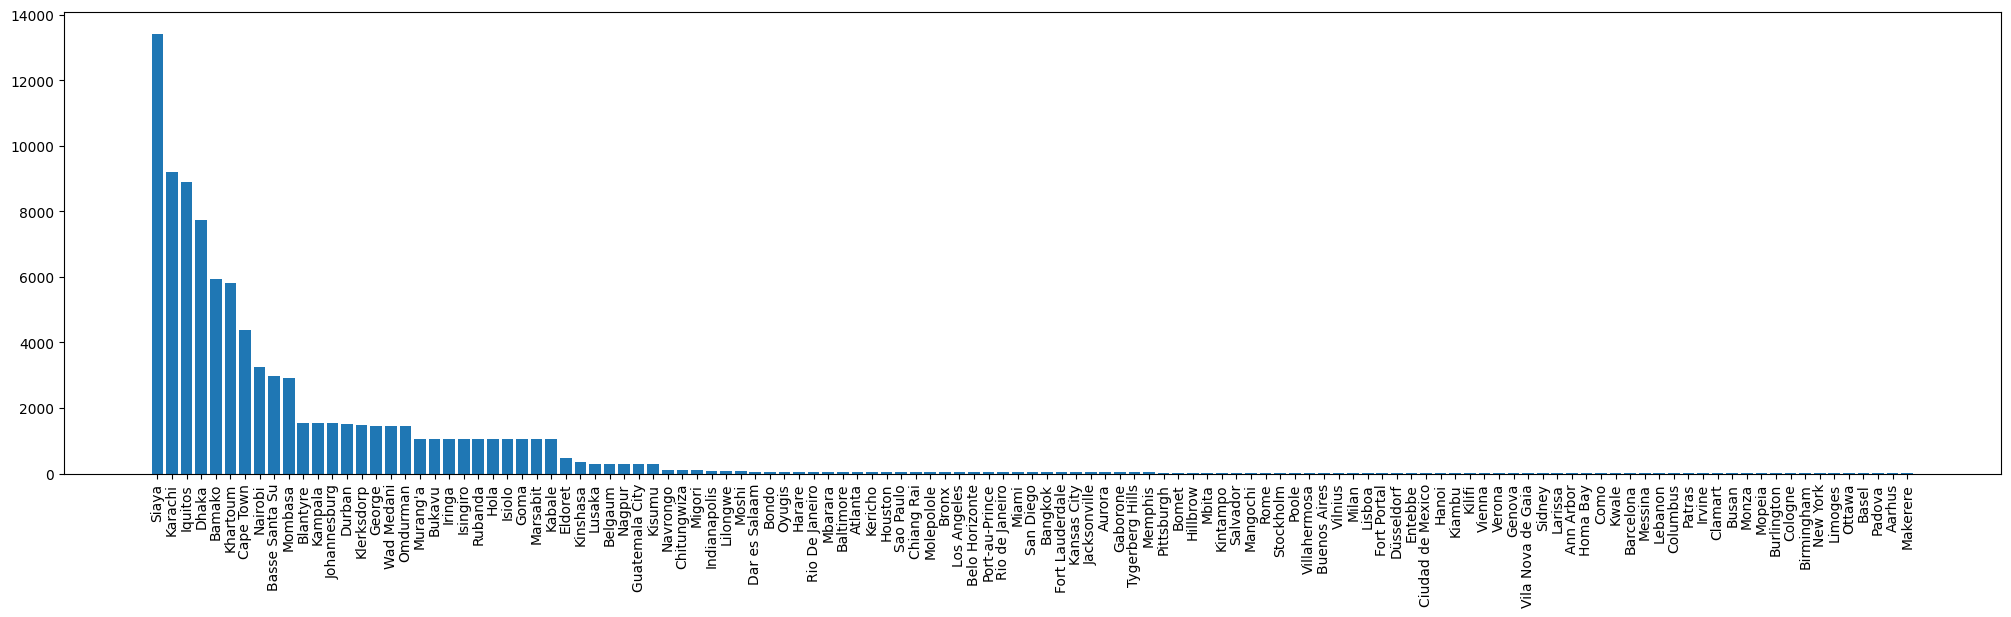

In [5]:
# Visualize city distribtuions
plt.figure(figsize=(25,6))
plt.bar(grouped_cities['city'],grouped_cities['Count'])
plt.xticks(rotation=90)
plt.show()

In [6]:
# sponsors analysis
# Group by sponsors from the sponsors_name column
grouped_sponsor = data.groupby('sponsor_name').size().reset_index(name='Count')

# sort data
grouped_sponsor = grouped_sponsor.sort_values(by='Count',ascending=False)


print(grouped_sponsor)

                                          sponsor_name  Count
48                    Kenya Medical Research Institute   5127
110                           University of Washington   4755
41   International Centre for Diarrhoeal Disease Re...   4583
4                                  Aga Khan University   4583
109                             University of Virginia   4583
..                                                 ...    ...
44   Jomo Kenyatta University of Agriculture and Te...      1
106                         University of Pennsylvania      1
82                                       Sue Napierala      1
57   Masinde Muliro University of Science and Techn...      1
100                           University of Copenhagen      1

[118 rows x 2 columns]


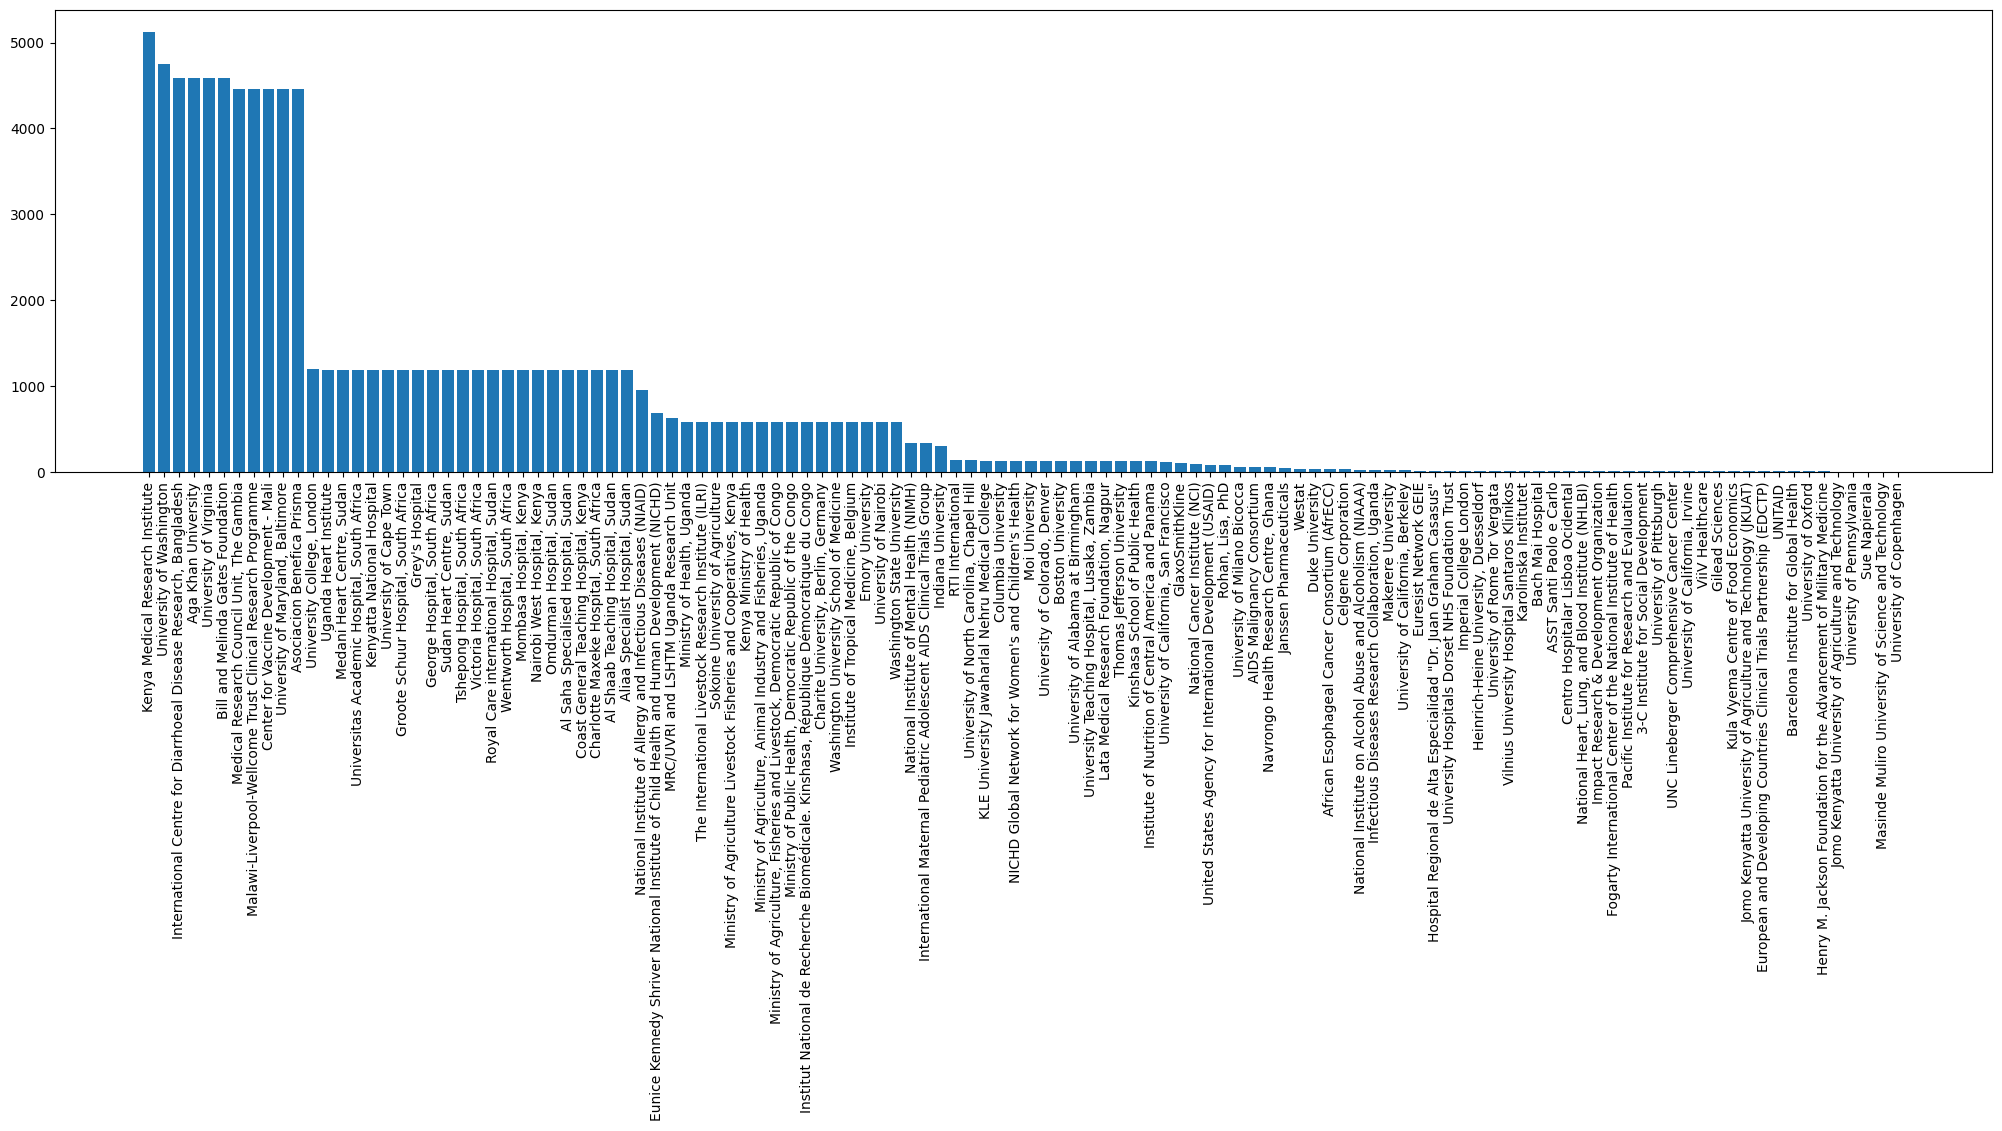

In [7]:
# Visualize sponsor distribtuions
plt.figure(figsize=(25,6))
plt.bar(grouped_sponsor['sponsor_name'],grouped_sponsor['Count'])
plt.xticks(rotation=90)
plt.show()

In [8]:

## Get data from Ministry of Agriculture
Ministry = 'Ministry of Agriculture'
m_sponsor = data[data['sponsor_name'].str.contains(Ministry, na=False)]
m_sponsor.head(50)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
53438,NCT05139524,2021-11-17,Virunga Hospital & North Kivu,Goma,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53439,NCT05139524,2021-11-17,South Kivu,Bukavu,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53440,NCT05139524,2021-11-17,Tana River County,Hola,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53441,NCT05139524,2021-11-17,Isiolo county,Isiolo,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53442,NCT05139524,2021-11-17,Marsabit county,Marsabit,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53443,NCT05139524,2021-11-17,Muranga county,Murang'a,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53444,NCT05139524,2021-11-17,Iringa,Iringa,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53445,NCT05139524,2021-11-17,Rwekubbo health centre IV & Isingiro district,Isingiro,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53446,NCT05139524,2021-11-17,Kabale Regional Referral Hospital & Kabale dis...,Kabale,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."
53447,NCT05139524,2021-11-17,Rwekubo Health Centre IV & Rubanda district,Rubanda,"Justin Masumu, PhD",Principal Investigator,Ministry of Agriculture Livestock Fisheries an...,rift valley fever,"(29564581,NCT05139524,""STUDY BACKGROUND\n\nThe..."


In [9]:
# Conditions analysis
# Group by spconditions from the downcase_name column
grouped_conditions = data.groupby('downcase_name').size().reset_index(name='Count')

# sort data
grouped_conditions = grouped_conditions.sort_values(by='Count',ascending=False)


print(grouped_conditions)

                    downcase_name  Count
52                       shigella  16335
8                           child  16335
12                       diarrhea  16335
54                          stemi   8712
48  remote ischaemic conditioning   8712
..                            ...    ...
4              cervical precancer      2
5                   cervix cancer      2
6                 cervix neoplasm      2
41        precancerous conditions      2
21                 hiv infections      2

[62 rows x 2 columns]


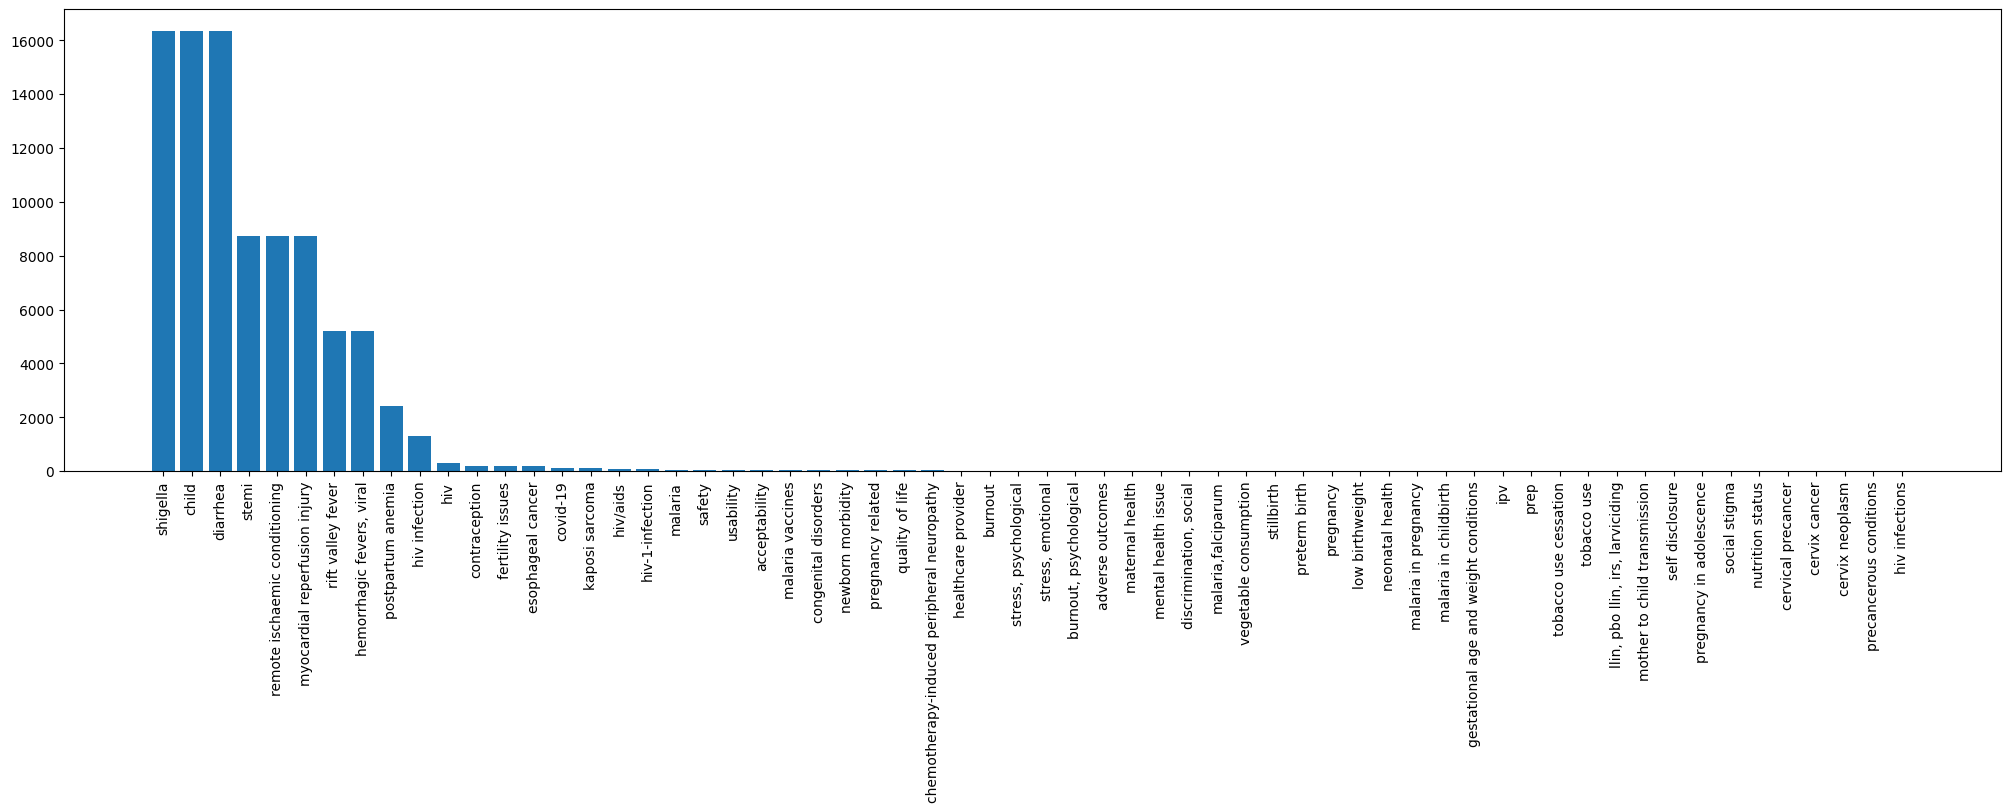

In [10]:
# Visualize conditions distribtuions
plt.figure(figsize=(25,6))
plt.bar(grouped_conditions['downcase_name'],grouped_conditions['Count'])
plt.xticks(rotation=90)
plt.show()

In [11]:
# Analysis of the study with most entries
# Count the number of occurrences for each unique ID
id_counts = data['nct_id'].value_counts()

# Convert the resulting Series back to a DataFrame for better readability
nct_id_counts = id_counts.reset_index()

# Rename the columns for clarity
nct_id_counts.columns = ['nct_id', 'Count']

# Print or use id_counts_df as needed
print(nct_id_counts)


         nct_id  Count
0   NCT06047821  49005
1   NCT04813159  26136
2   NCT05139524  10440
3   NCT05590260   2432
4   NCT05154513   1320
5   NCT05285670    600
6   NCT06085105    216
7   NCT05177393    180
8   NCT04405700    168
9   NCT06046053    150
10  NCT05463380    120
11  NCT05797662    108
12  NCT03855995     98
13  NCT05546242     84
14  NCT05757167     72
15  NCT04633655     60
16  NCT05549726     44
17  NCT05768763     40
18  NCT05862857     24
19  NCT06036238     24
20  NCT05383755     20
21  NCT05599581     18
22  NCT05351606     12
23  NCT05992376      9
24  NCT06165614      8
25  NCT03947190      6
26  NCT04966702      4
27  NCT05882916      4
28  NCT04182126      4
29  NCT06002620      3
30  NCT04938518      2
31  NCT05147519      2


In [12]:
top = 'NCT06047821'
top_id = data[data['nct_id'].str.contains(top, na=False)]
top_id.head(10)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
374,NCT06047821,2023-09-12,"icddr,b Dhaka Hospital",Dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
375,NCT06047821,2023-09-12,Mugda Medical College Hospital,Dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
376,NCT06047821,2023-09-12,Sir Salimullah Medical College Hospital,Dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
377,NCT06047821,2023-09-12,Basse Hospital,Basse Santa Su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
378,NCT06047821,2023-09-12,Gambisara Health Centre (HC),Basse Santa Su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
379,NCT06047821,2023-09-12,Abidha Health Center,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
380,NCT06047821,2023-09-12,Akala Health Center,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
381,NCT06047821,2023-09-12,Bar Agulu Health Center,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
382,NCT06047821,2023-09-12,Dienya Health Centre,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
383,NCT06047821,2023-09-12,Lwak Mission Hospital,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."


In [13]:
top_id['city'] = top_id['city'].str.lower()
top_id.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6012\657638336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_id['city'] = top_id['city'].str.lower()


,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
374,NCT06047821,2023-09-12,"icddr,b Dhaka Hospital",dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
375,NCT06047821,2023-09-12,Mugda Medical College Hospital,dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
376,NCT06047821,2023-09-12,Sir Salimullah Medical College Hospital,dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
377,NCT06047821,2023-09-12,Basse Hospital,basse santa su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
378,NCT06047821,2023-09-12,Gambisara Health Centre (HC),basse santa su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
379,NCT06047821,2023-09-12,Abidha Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
380,NCT06047821,2023-09-12,Akala Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
381,NCT06047821,2023-09-12,Bar Agulu Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
382,NCT06047821,2023-09-12,Dienya Health Centre,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
383,NCT06047821,2023-09-12,Lwak Mission Hospital,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."


In [14]:
# Import counties data set
city = pd.read_csv('county.csv')
city['county'] = city['county'].str.lower()
city.head()


,id,county
0,1,mombasa
1,2,kwale
2,3,kilifi
3,4,tana river
4,5,lamu


In [15]:
city_rows = top_id[top_id['city'].isin(city['county'])]
city_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13365 entries, 379 to 49371
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             13365 non-null  object
 1   first_date         13365 non-null  object
 2   facility_name      13365 non-null  object
 3   city               13365 non-null  object
 4   investigator       13365 non-null  object
 5   investigator_role  13365 non-null  object
 6   sponsor_name       13365 non-null  object
 7   downcase_name      13365 non-null  object
 8   description        13365 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


In [104]:
# city_rows.shape
city_rows['facility_name'].str.count('Dienya Health Centre').sum()

1485

In [16]:
# Group by the counts of each facility in facilities column
grouped_facilities = city_rows.groupby('facility_name').size().reset_index(name='Count')
print(grouped_facilities)

                    facility_name  Count
0            Abidha Health Center   1485
1             Akala Health Center   1485
2         Bar Agulu Health Center   1485
3            Dienya Health Centre   1485
4           Lwak Mission Hospital   1485
5           Ongielo Health Centre   1485
6  Siaya County Referral Hospital   1485
7        Ting Wangi Health Center   1485
8             Wagai Health Center   1485


What makes a site?
An analysis on Siaya county.
Look into the facilities that were listed as study sites.
- Geolocation mapping of the study sites
- Look at the level of the facilities
- Analyise on the population it serves, nearing facilities

In [17]:
## Get data from Siaya County
siaya = 'Siaya'
siaya_sites = data[data['city'].str.contains(siaya, na=False)]
siaya_sites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13428 entries, 379 to 52980
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             13428 non-null  object
 1   first_date         13428 non-null  object
 2   facility_name      13428 non-null  object
 3   city               13428 non-null  object
 4   investigator       13428 non-null  object
 5   investigator_role  13428 non-null  object
 6   sponsor_name       13428 non-null  object
 7   downcase_name      13428 non-null  object
 8   description        13428 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


In [26]:
# Group data by facility name

grouped_facility = siaya_sites.groupby('facility_name').size().reset_index(name='Count')

# sort data
grouped_facility = grouped_facility.sort_values(by='Count',ascending=False)


print(grouped_facility)

                     facility_name  Count
0             Abidha Health Center   1485
1              Akala Health Center   1485
2          Bar Agulu Health Center   1485
3             Dienya Health Centre   1485
4            Lwak Mission Hospital   1485
5            Ongielo Health Centre   1485
7   Siaya County Referral Hospital   1485
9         Ting Wangi Health Center   1485
10             Wagai Health Center   1485
8          Siaya District Hospital     60
6      Rwambwa Sub County Hospital      3


In [18]:
siaya_pd = pd.read_csv('siaya_healthcare_facilities.csv')

siaya_pd.head(10)

,OBJECTID,Facility_N,Type,Owner,County,Sub_County,Division,Location,Sub_Locati,Constituen,Nearest_To,Latitude,Longitude
0,32,Abidha Health Centre,Health Centre,Ministry of Health,Siaya,Rarieda,Rarieda,East Asembo,Omia Mwalo,RARIEDA,Asembo Bay,-0.15902,34.41064
1,195,Akala Health Centre,Health Centre,Ministry of Health,Siaya,Gem,Wagai,South West Gem,Ndori,GEM,Akala Market,0.05961,34.42139
2,256,Almacy Medical Clinic,Medical Clinic,Private Practice - Nurse / Midwife,Siaya,Bondo,Usigu,W Yimbo,Usenge,BONDO,Usenge,-0.06349,34.06152
3,279,Aluor Mission Health Centre,Health Centre,Kenya Episcopal Conference-Catholic Secretariat,Siaya,Gem,Wagai,South Gem,Onyinyore,GEM,Aluor Market,0.01047,34.46500
4,308,Ambira Sub-District Hospital,Sub-District Hospital,Ministry of Health,Siaya,Ugunja,Ugunja,Central Ugenya,Ambira,UGENYA,Ugunja Market,0.17689,34.27269
5,363,Anyuongi Dispensary,Dispensary,Ministry of Health,Siaya,Bondo,Nyang'oma,South Sakwa,East Miguena,BONDO,Anyuongi,-0.17618,34.27613
6,368,Apex Clinic,Dispensary,Private Enterprise (Institution),Siaya,Bondo,Usigu,W Yimbo,Usenge,BONDO,Usenge,-0.06349,34.06152
7,402,Aro (SDA) Dispensary,Dispensary,Christian Health Association of Kenya,Siaya,Bondo,Maranda,N Sakwa,Abom,BONDO,Ndori,-0.06953,34.35579
8,413,Asayi Dispensary,Dispensary,Ministry of Health,Siaya,Gem,Yala,Asayi,Sirembe,GEM,Sirembe Market,0.11760,34.37246
9,414,Asembo Bay Health Clinic (Rarieda),Medical Clinic,Private Practice - Clinical Officer,Siaya,Rarieda,Rarieda,East Asembo,Omia Diere,RARIEDA,Kamito market,-0.18150,34.38582


In [19]:

# proper cleaning of data needed
strings = ['Abidha','Akala','Agulu','Dienya','Lwak','Ongielo','Siaya County','Ting','Wagai','Siaya District','Rwambwa']

siaya_pd['Is_Study'] = siaya_pd['Facility_N'].str.contains('|'.join(strings), case=False)

siaya_pd.head(10)



,OBJECTID,Facility_N,Type,Owner,County,Sub_County,Division,Location,Sub_Locati,Constituen,Nearest_To,Latitude,Longitude,Is_Study
0,32,Abidha Health Centre,Health Centre,Ministry of Health,Siaya,Rarieda,Rarieda,East Asembo,Omia Mwalo,RARIEDA,Asembo Bay,-0.15902,34.41064,True
1,195,Akala Health Centre,Health Centre,Ministry of Health,Siaya,Gem,Wagai,South West Gem,Ndori,GEM,Akala Market,0.05961,34.42139,True
2,256,Almacy Medical Clinic,Medical Clinic,Private Practice - Nurse / Midwife,Siaya,Bondo,Usigu,W Yimbo,Usenge,BONDO,Usenge,-0.06349,34.06152,False
3,279,Aluor Mission Health Centre,Health Centre,Kenya Episcopal Conference-Catholic Secretariat,Siaya,Gem,Wagai,South Gem,Onyinyore,GEM,Aluor Market,0.01047,34.46500,False
4,308,Ambira Sub-District Hospital,Sub-District Hospital,Ministry of Health,Siaya,Ugunja,Ugunja,Central Ugenya,Ambira,UGENYA,Ugunja Market,0.17689,34.27269,False
5,363,Anyuongi Dispensary,Dispensary,Ministry of Health,Siaya,Bondo,Nyang'oma,South Sakwa,East Miguena,BONDO,Anyuongi,-0.17618,34.27613,False
6,368,Apex Clinic,Dispensary,Private Enterprise (Institution),Siaya,Bondo,Usigu,W Yimbo,Usenge,BONDO,Usenge,-0.06349,34.06152,False
7,402,Aro (SDA) Dispensary,Dispensary,Christian Health Association of Kenya,Siaya,Bondo,Maranda,N Sakwa,Abom,BONDO,Ndori,-0.06953,34.35579,False
8,413,Asayi Dispensary,Dispensary,Ministry of Health,Siaya,Gem,Yala,Asayi,Sirembe,GEM,Sirembe Market,0.11760,34.37246,False
9,414,Asembo Bay Health Clinic (Rarieda),Medical Clinic,Private Practice - Clinical Officer,Siaya,Rarieda,Rarieda,East Asembo,Omia Diere,RARIEDA,Kamito market,-0.18150,34.38582,False


In [20]:
# Import follium for analysis of data using geo mapping
import folium

In [21]:
# convert boolean values to study site or not
siaya_pd['Is_Study'] = siaya_pd['Is_Study'].map({True: 'Study_site', False: 'Not_Study_site'})
siaya_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    169 non-null    int64  
 1   Facility_N  169 non-null    object 
 2   Type        169 non-null    object 
 3   Owner       169 non-null    object 
 4   County      169 non-null    object 
 5   Sub_County  169 non-null    object 
 6   Division    169 non-null    object 
 7   Location    169 non-null    object 
 8   Sub_Locati  169 non-null    object 
 9   Constituen  169 non-null    object 
 10  Nearest_To  169 non-null    object 
 11  Latitude    169 non-null    float64
 12  Longitude   169 non-null    float64
 13  Is_Study    169 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 18.6+ KB


In [22]:
map = folium.Map(location=[siaya_pd.Latitude.mean(), siaya_pd.Longitude.mean()], zoom_start=11, control_scale=True)

# Define different icons for each category
icon_mapping = {
    'Study_site': {'icon': 'star', 'color': 'red', 'size': (40, 40)},
    'Not_Study_site': {'icon': 'flag', 'color': 'blue', 'size': (10, 10)},
}

for index, location_info in siaya_pd.iterrows():

    icon_info = icon_mapping.get(location_info['Is_Study'], {'icon': 'info-sign', 'color': 'green', 'size': (25, 25)})

    #icon_info = icon_mapping.get(location_info['Is_Study'], {'icon': 'info-sign', 'size': (25, 25)})

    #icon_color = 'red' if location_info['Is_Study'] == 'Study_site' else 'blue'
    
    icon = folium.Icon(
        color = icon_info['color'], 
        icon = icon_info['icon'], 
        icon_size = icon_info['size'])
    
    #icon = folium.Icon(color=icon_color,
                       #icon=icon_mapping.get(location_info['Is_Study'], 'info-sign'))

    folium.Marker([location_info["Latitude"], location_info["Longitude"]],
                  popup=location_info["Facility_N"],
                  icon=icon).add_to(map)

map

In [84]:
# Analysis on the level of the facilties (level 1 - 5 or 6)


